#1. 금융 데이터 수집

In [ ]:
#!ls -al
#!pip list
!pip install pandas==2.2.1


In [13]:
!python --version

Python 3.10.12


## api 활용 수집


In [ ]:
!pip install -U pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 14.7 MB/s eta 0:00:00


In [ ]:
from pykrx import stock
df1 = stock.get_market_ohlcv_by_date( "20241201", "20241215", "005930"  )
df2 = stock.get_market_ohlcv_by_date( "20241201", "20241215", "000660"  )

df1.columns = ["open", "high", "low", "close", "volume", "per_chn"]
df2.columns = ["open", "high", "low", "close", "volume", "per_chn"]

#df.index / df.values
#df.head()
#종목코드, 원하시는 기간...
#df.mean()#각 컬럼의 평균
#df.isnull().sum()#결측치 여부

#df.close.diff()  #차분
#df.close.pct_change()  #등락율.
df1

In [ ]:
df1.close - df2.close
df1.merge( df2,  left_index=True, right_index=True, suffixes=("_005930", "_000660") )
import pandas as pd
pd.concat([df1, df2], axis=1)  #열방향 추가
pd.concat([df1, df2], axis=0)  #행방향 추가

In [44]:
df1["newcol"]= df1.per_chn >= 0
df1.close

def func1(x):
  if x >50000:
    return "high"
  else:
    return "low"

df1.close.apply( func1 ).value_counts()
#df1.applymap( func1 )

close
high    10
Name: count, dtype: int64

In [ ]:
# 1,3,5,7 을 갖는 리스트 l1
l1 = [1,3,5,7]
l1[0]
l1[2]
l1[1:3]

from sklearn.datasets import load_iris
load_iris()

l1 * 2

import numpy as np
arr1 = np.array( l1   )
arr1 * 2

l1
for x in l1:
  print(x*3)

if 3 in l1:
  print("있음")
else:
  print("없음")

In [63]:
l2 = []
for i in l1:
  if i > 4:
    l2.append(i*3)

[  i*3    for i in l1   if i > 4     ]


[15, 21]

In [64]:
#adv.csv 파일을 읽으셔서, adv
adv = pd.read_csv("adv.csv")
adv.values


FileNotFoundError: [Errno 2] No such file or directory: 'adv.csv'

In [52]:


tickers = stock.get_market_ticker_list("20210115")
tickers

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "m")
df.head(5)

/usr/local/lib/python3.10/dist-packages/pykrx/stock/stock_api.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').apply(how)


시가     고가     저가     종가        거래량
날짜                                               
2021-01-31  81000  90000  80200  88800  207737907

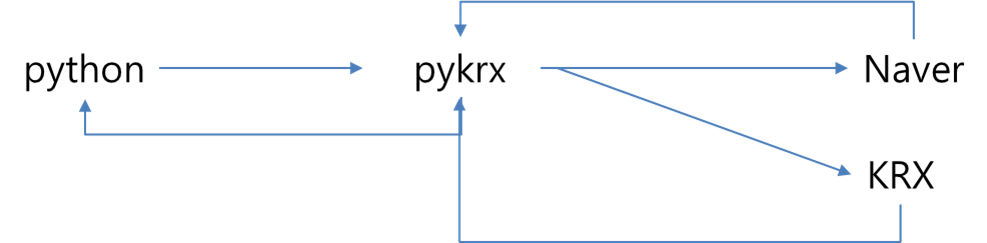

In [ ]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
len(tickers)
tickers

stock1 = stock.get_market_ticker_name("060310")
stock1


'3S'

In [ ]:
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

#월별: m, 일별: d, 연도별: y
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "d")
df

df = stock.get_market_ohlcv_by_date("20201104", "20210108", "005930", "m")
df



시가     고가     저가     종가        거래량
날짜                                               
2020-11-30  58900  69500  57800  66700  460991347
2020-12-31  67100  81300  67100  81000  529998852
2021-01-31  81000  90000  80200  88800  207737907

In [ ]:
df = stock.get_market_price_change_by_ticker("20210104", "20210115")
print(df.head(5))

df = stock.get_market_ohlcv_by_date("20210104", "20210115", "000020")
df

#KOSPI, KOSDAQ, KONEX 지원
df = stock.get_market_trading_volume_by_date("20210104", "20210115", "KOSPI")
print(df.head(5))

df = stock.get_market_trading_volume_by_date("20200101", "20210115", 'KOSPI', freq='m')
df

df = stock.get_market_trading_value_by_date("20210104", "20210115", "KOSPI")
df


            종목명      시가      종가   변동폭   등락률       거래량          거래대금
티커                                                                 
095570   AJ네트웍스    4615    4510  -105 -2.28   3982449   18726203680
006840    AK홀딩스   25150   26300  1150  4.57   1590631   41092351750
027410      BGF    4895    4830   -65 -1.33   4729036   23091599895
282330   BGF리테일  135500  145000  9500  7.01    809850  114155484750
138930  BNK금융지주    5680    5880   200  3.52  36350605  209410643490
                기관합계      기타법인        개인     외국인합계  전체
날짜                                                    
2021-01-04 -18241927  -2321155  13307925   7255157   0
2021-01-05   -282797 -20356879  21335001   -695325   0
2021-01-06 -28606702   1763197  19464237   7379268   0
2021-01-07  16803440  -4926713 -23957887  12081160   0
2021-01-08 -24886527   1334709   6228334  17323484   0


기관합계         기타법인             개인          외국인합계  전체
날짜                                                                      
2021-01-04 -1189876714363  69165156608  1031014166618    89697391137   0
2021-01-05  -536265643081  16098509714   728387733108  -208220599741   0
2021-01-06 -1369155503764  37370130195  1729261196142  -397475822573   0
2021-01-07  1033917002121  36342229807 -1183634539101   113375307173   0
2021-01-08 -1147931424901  63596153201  -559141825960  1643477097660   0
2021-01-11 -3743203896260 -31327947241  4492145003867  -717613160366   0
2021-01-12 -1723898682006  30388878033  2312445113552  -618935309579   0
2021-01-13  -372450411172   9868157834   169086090692   193496162646   0
2021-01-14 -1428981445508  38743362517   712730906649   677507176342   0
2021-01-15 -1414745885546  54444293672  2113924037705  -753622445831   0

In [ ]:
df = stock.get_market_fundamental_by_ticker("20210115")
print(df.head(2))

df = stock.get_market_fundamental_by_date("20210104", "20210115", '005930')
print(df.head(2))

df = stock.get_market_fundamental_by_date("20201004", "20210115", "005930", "m")
print(df.head(2))


          BPS    PER   PBR   EPS   DIV  DPS
티커                                         
095570   6802   4.59  0.66   982  6.65  300
006840  62448  12.13  0.42  2168  2.85  750
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2021-01-04  37528  26.22  2.21  3166  1.71  1416
2021-01-05  37528  26.50  2.24  3166  1.69  1416
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2020-10-31  37528  18.54  1.56  3166  2.41  1416
2020-11-30  37528  18.13  1.53  3166  2.47  1416


In [ ]:
#005930 종목에 대해서 주가를 수집해보세요(특정기간...)

In [ ]:
df = stock.get_market_fundamental_by_date("20230703", "20230707", '005930')
print(df.head(2))

              BPS   PER   PBR   EPS   DIV   DPS
날짜                                             
2023-07-03  57822  9.06  1.26  8057  1.98  1444
2023-07-04  57822  9.06  1.26  8057  1.98  1444


In [ ]:
import pandas as pd
df.index
pd.to_datetime(df.index )

DatetimeIndex(['2023-07-03', '2023-07-04', '2023-07-05', '2023-07-06',
               '2023-07-07'],
              dtype='datetime64[ns]', name='날짜', freq=None)

## BPS   
- bps(Basis Points), 금리 단위, 1bps는 0.01% 의미
- 금리가 50bps 상승 시, 금리가 0.50% 증가했음 의미
- 금리 변동을 더 정밀하게 표현하기 위해 사용

## PER   
- PER(Price to Earnings Ratio), 주가수익비율
- 주가를 주당순이익(EPS)으로 나눈 값
- PER은 투자자들이 특정 주식의 가치가 적절한지 판단 근거
- 높은 PER은 주식이 고평가, 낮은 PER은 저평가


## PBR   
- PBR(Price to Book Ratio), 주가순자산비율
- 주식의 현재 가격을 주당순자산가치(BVPS)로 나눈 값
- PBR은 기업의 자산 가치를 기준으로 주가가 적절한지 평가 근거
- PBR이 1보다 크면 주가가 순자산가치보다 높게 평가, 1보다 작으면 주가가 순자산가치보다 낮게 평가

## EPS   
- EPS(Earnings Per Share), 주당순이익
- 기업의 순이익을 발행된 주식 수로 나눈 값
- EPS는 한 주당 얼마나 많은 이익을 창출했는지 보여줌
- 기업의 수익성 평가
- 높은 EPS는 기업이 더 많은 이익을 내고 있음을 의미

##DIV   
- DIV(Dividend), 배당금
-기업이 이익의 일부를 주주들에게 현금이나 추가 주식 형태로 분배
- 기업의 수익성과 재정 상태를 의미, 투자자에게는 정기적인 수익을 제공
- 배당금 지급의 의미: 안정적인 수익 창출, 장기적인 성장보다 주주들에게 이익을 돌려주는 데 중점
- 배당금 수익률은 배당금의 크기를 주가로 나누어 계산

##DPS
- DPS(Dividends Per Share), 주당 배당금
- 기업이 발행한 주식 한 주당 지급하는 배당금 금액 의미
- DPS는 기업의 배당 정책을 나타내며, 주주가 받을 수 있는 실제 현금 배당 수익을 평가하는 데 사용, 총배당금을 발행주식수로 나누어 계산



#2.웹 수집

- 1 크롤링(Crawling), 스크래핑(Scarping)

- 2 HTTP(Hyper Text Transfer Protocol): 인터넷에서 데이터를 주고 받을 수 있는 프로토콜

- 3 HTML: 웹에 사용되는 표준 Markup언어

- 4 파싱(Parsing) : 어떤 페이지(문서, html)에서 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보 가공



1. 수집대상 뉴스 검색 및 제목 저장

In [ ]:
from bs4 import BeautifulSoup
from lxml import etree
from urllib import parse
import requests
import urllib.request
import urllib.parse
import numpy as np
import pandas as pd
import time

#----------------------------------------------#
#변경할 부분
startdate = "2023.07.03"
enddate = "2023.07.07"
searchword ="삼성전자"#검색어
#----------------------------------------------#

base_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query"+parse.urlencode([('',searchword)], doseq=True)+"&sort=1&photo=3&field=0&pd=3&ds="+startdate+"&de="+enddate+"&mynews=1&office_type=0&office_section_code=0&news_office_checked=&nso=so:dd,p:from"+startdate.replace(".", "")+"to"+enddate.replace(".", "")+",a:all&mynews=0&start="
titles = [ ]
urls = [ ]
i=1

while True:
 try:
    time.sleep(0.45)
    url = base_url+str(i)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    t_news = soup.select('a.news_tit')  #클래스 표시
    t_len = len(t_news)

    if t_len <1:
        break

    for j in np.arange(t_len)+1:
            try:
                titles.append(soup.select('a.news_tit')[j].text)
                urls.append(soup.select('a.info')[j]['href'])
            except Exception as e:
                continue
    i=i+10

 except Exception as e:
    continue

result = pd.DataFrame({"Url": urls, "Title":titles})
result.Url[0]

'https://n.news.naver.com/mnews/article/032/0003234804?sid=101'

#3. 텍스트 데이터 처리

### NLP & Text Mining
- 자연어처리: Natural Language Processing
- Text Mining: 텍스트 데이터를 자연어 처리 기술로 유용한 정보를 추출하여 분석
- 텍스트 마이닝 응용 분야: 분류, 감성 분석, 요약, 군집

- 텍스트 자료의 정형화
 - TDM 또는 DTM
 - Word2Vec, Doc2Vec 등 임베딩 기법


- 사용 라이브러리
 - NLTK(National Language Toolkit for python): 기본 필수 라이브러리, 속도 이슈.
 - Gensim : 토픽 모델링, 임베딩 등의 기능 제공
 - Word Colud : 시각화
 - KoNLPy: 한글처리

- NLP 단계
 - Cleansing: 불필요한 문자/문장부호/수치/태그 등 제거
 - 토큰(token): 문법적으로 최소 언어요소
 - 토큰화(Text Toeknization): Corpus로 부터 토큰 추출
 - Stop word 제거 : 분석에 큰 의미가 없는 단어(a, the, is, will등) 정리
 - Stemming / Lemmatization : 어근(단어 원형) 추출+단어원형 찾기
 - N-gram: 개별 단어 각각이 토큰이 되는 경우 문맥적 고려 어려움, N-gram은 연속된 n개의 단어를 하나의 토큰처럼 분리. n개 윈도우로 순서대로 토큰화


## 한글 처리
- 한국어 처리: 형태소 분석기 Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)



- 형태소 분석:
 - KoNLPy는 다음과 같은 다양한 형태소 분석, 태깅 라이브러리를 제공

 - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발.

 - http://semanticweb.kaist.ac.kr/hannanum/

 - Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.

 - http://kkma.snu.ac.kr/

 - Komoran: 코모란. Shineware에서 개발.

 - https://github.com/shin285/KOMORAN

 - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.

 - https://bitbucket.org/eunjeon/mecab-ko

 - Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.

 - https://github.com/open-korean-text/open-korean-text

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt
okt=Okt()
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
# 텍스트를 형태로 단위로 나누는데,이때 각 단어에서 어간을 추출

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [ ]:
print(okt.pos('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))
# 품사추출.

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


In [ ]:
print(okt.nouns('열심히 코딩한 당신, 연휴에는 여행을 가봐요'))
# 명사추출.

['코딩', '당신', '연휴', '여행']


In [ ]:
#news.csv를 읽어서, 1~10번째 신문기사에 대한 명사들을 추출해보세요
#각 결과를 하나의 리스트로 묶어주세요.
#Kkma로 수행
import pandas as pd
from konlpy.tag import Kkma
kkma = Kkma()
news = pd.read_csv("news.csv", index_col=0) #인코딩 깨져서 못 읽으시는 경우 encoding="CP949"
news10 = news.articles[0:10]
result = []
for i in range(0, 10):
  result.append( kkma.nouns( news10.values[i]) )

In [ ]:
[ i for i in result[0]  if i not in ['암모니아', '요소']] #stop words를 필터링...
#다음 글자들을 stopwords라는 리스트로 만드시고, 위의 result에서 stopwords를 제거한 result2를 만들어주세요
#것, 은, 는, 때, 과, 이, 배포, 금지, 기자, 뉴스
stopwords = ["것", "은", "는", "때", "과", "이", "배포", "금지", "기자", "뉴스"]
result2 = []
for j in range(0,10):
 result2.append( [ i for i in result[j]  if i not in stopwords] )

In [ ]:
#형태소 분석하는 함수
def token( text ):
  tokened = okt.nouns( text )
  return tokened

from sklearn.feature_extraction.text import CountVectorizer
tf_vect = CountVectorizer(tokenizer=token)
dtm = tf_vect.fit_transform( news10 )
dtm

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<10x1357 sparse matrix of type '<class 'numpy.int64'>'
	with 1778 stored elements in Compressed Sparse Row format>

In [ ]:
#news를 400개 중에서 0과 1 범주가 골고루 섞이게 파티셔닝7:3으로 하셔서, test셋의 신문기사들에 대해서 DTM
#Kkma로 명사 추출
from sklearn.model_selection import train_test_split
train, test = train_test_split( news, stratify=news.label, test_size=0.3)
test.articles

#형태소 분석하는 함수
def token1( text ):
  tokened = kkma.nouns( text )
  return tokened

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tf_vect = TfidfVectorizer(tokenizer=token,  stop_words = ["것", "배포","금지"], min_df=5)#11675->1361
dtm = tf_vect.fit_transform( test.articles )
dtm.todense()
tf_vect.vocabulary_#딕셔너리, 명사->숫자ID

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'환자': 1066,
 '비율': 412,
 '동시': 236,
 '중': 839,
 '수': 497,
 '지금': 854,
 '예방': 617,
 '등': 244,
 '지난': 855,
 '무료': 316,
 '터': 955,
 '진료': 873,
 '단': 190,
 '의료': 675,
 '진': 871,
 '쪽': 882,
 '연합뉴스': 609,
 '계속': 64,
 '추위': 923,
 '크게': 946,
 '늘': 183,
 '무엇': 317,
 '올해': 632,
 '겨울': 48,
 '등장': 246,
 '주의': 831,
 '관리': 94,
 '주': 819,
 '기준': 145,
 '의심': 678,
 '명': 297,
 '증가': 849,
 '발령': 346,
 '당시': 201,
 '수준': 505,
 '수가': 498,
 '약': 572,
 '배': 361,
 '자료': 731,
 '중심': 844,
 '세': 478,
 '가장': 6,
 '전체': 768,
 '그래픽': 125,
 '기자': 143,
 '달리': 196,
 '첫': 899,
 '시작': 529,
 '의미': 676,
 '결과': 50,
 '총': 909,
 '건': 41,
 '계열': 66,
 '통상': 961,
 '간': 14,
 '소규모': 486,
 '각각': 11,
 '종류': 817,
 '얘기': 575,
 '당국': 200,
 '주목': 826,
 '다만': 186,
 '사람': 422,
 '가능성': 2,
 '마찬가지': 273,
 '한번': 1015,
 '경우': 57,
 '다른': 185,
 '통한': 965,
 '관': 90,
 '감염': 20,
 '확산': 1062,
 '방지': 358,
 '위해': 660,
 '질환': 879,
 '우선': 646,
 '게': 46,
 '며': 294,
 '만': 275,
 '이상': 686,
 '방문': 353,
 '개월': 29,
 '내년': 162,
 '전국': 758,
 '지정': 866,
 '기관': 1

- 1) morphs : 형태소 추출
- 2) pos : 품사 태깅
- 3) nouns : 명사 추출


- Kkma 이용 시

In [ ]:
from konlpy.tag import Kkma
kkma=Kkma()
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [ ]:
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


# 4. 문헌 용어 행렬(Document-Term Matrix, DTM)


- 희소 표현(Sparse representation)
- 단순 빈도 수 기반 접근




- TF-IDF(Term Frequency-Inverse Document Frequency)
 - TF-IDF는 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여


- sklearn을 이용한 DTM과 TF-IDF 실습

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
news = pd.read_csv("news.csv", index_col=0)
news

label                                           articles
0        0  게티이미지뱅크 콩나물(사진)은 대두를 발아시켜 뿌리를 자라게 한 것이다. 동의보감에...
1        0  사진 한 장 없이 떠난 일지 스님 불교 현실에 대한 질타 등 생전에 연재했던 글, ...
2        0  이재익의 아재음악 열전전태관(왼쪽)과 김종진. <한겨레> 자료사진 2018년을 얼마...
3        0  서울대병원 제공서울대병원은 올해 1월부터 국내에서 독자적으로 개발한 인공지능 기술을...
4        0  ㆍ2.1㎓ 속도 ‘엑시노스 오토 V9’ㆍ2021년 생산 차량부터 탑재2021년 생산...
..     ...                                                ...
395      1  박정호 SK텔레콤 사장이 SK브로드밴드 사장을 겸직한 이후 첫 행보로 ‘옥수수 연합...
396      1  LG전자가 세계 최초 88인치 8K OLED TV를 내놓는다. 인공지능(AI) 기술...
397      1  게임은 사회악 아닌 건전한 놀이문화(지디넷코리아=이도원 기자)"게임산업 전체의 발전...
398      1  10여년 만에 매출예상치 하향…주가도 폭락(지디넷코리아=김익현 기자)최근 10년 여...
399      1  [머니투데이 판교(경기)=김지영 기자] [최대주주 지분 매각설에 '긴장감' 흘러…게...

[400 rows x 2 columns]

In [ ]:
!pip install konlpy

from konlpy.tag import Okt
okt = Okt() #Kkma, Hannanum....
okt.nouns( news.articles[0] )  #수집된 첫번째 기사에 대한 명사

def tokenizer(text):  #함수를 만드는 부분
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = okt.nouns(text) #nouns를 morphs로 바꾸면 명사외에도...
    return tokens_ko


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer(tokenizer=tokenizer,
                          #바뀐곳-stop_words로 잡힌 단어를 제거
                          stop_words=['건','악','최', '초','총', '탈', '폭'],
                          #바뀐곳-0~1사이의 값, 단어
                          min_df=0.1)
dtm = tf_vect.fit_transform( news.articles )
dtm


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<400x364 sparse matrix of type '<class 'numpy.float64'>'
	with 29578 stored elements in Compressed Sparse Row format>